In [20]:
import wcslib as wcs
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [21]:
# a)
dt = 1/22050
Tb = 0.04
bit_seq = np.random.randint(2, size=10)
print(bit_seq)
xb = wcs.encode_baseband_signal(bit_seq, Tb)
t = np.arange(0, xb.shape[0])*dt

[0 1 0 0 1 1 0 0 1 1]


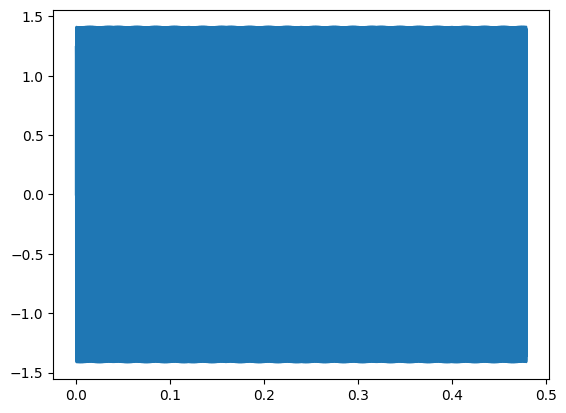

In [22]:
# b
wc = 3800*2 * np.pi
xc = np.sin(wc * t) * np.sqrt(2)

xm = xc * xb

plt.plot(t, xm, label="xm")

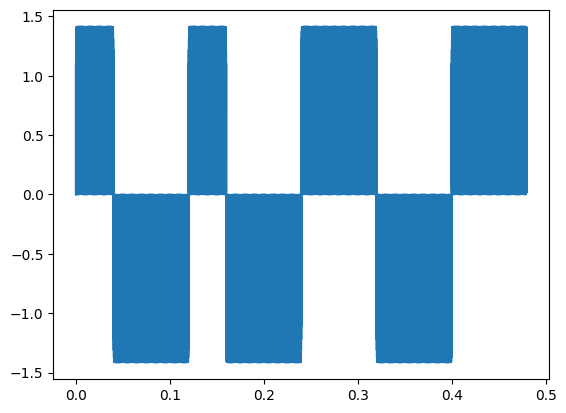

In [23]:
# c
yd = xc * np.sin(wc * t) * xb
plt.plot(t, yd, label="yd")

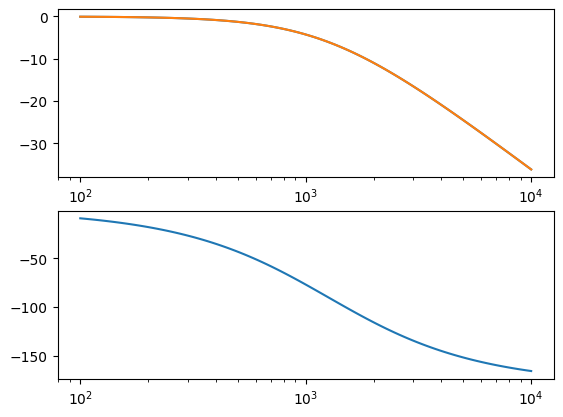

In [24]:
# d
alpha = 400 * np.pi
num = np.array([alpha**2])
den = np.array([1, 2 * alpha, alpha**2]) 
H = signal.TransferFunction(num, den)

w, mag, phase = H.bode()
fig, ax4 = plt.subplots(2 , 1)
ax4[0].semilogx(w, mag)
ax4[0].plot(w, mag)
ax4[1].semilogx(w, phase)

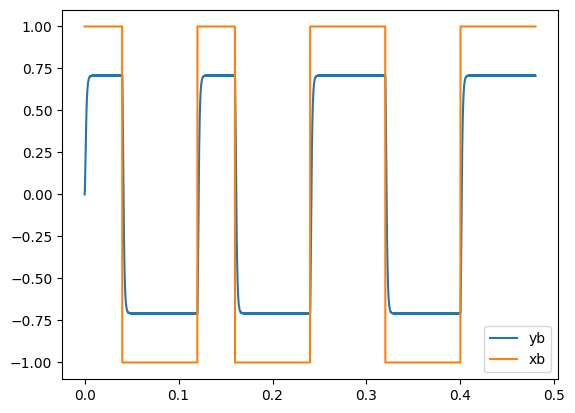

In [25]:
# e
T, yb, xout = signal.lsim(H, yd, t)
plt.plot(t, yb, label="yb")

plt.plot(t, xb, label="xb")
plt.legend()

In [26]:
# f
recovered_bits = wcs.decode_baseband_signal(yd, Tb)
print(recovered_bits)

[0 1 0 0 1 1 0 0 1 1]
